In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split 

diabetes=load_diabetes
X_data,t=load_diabetes(return_X_y=True) 
# split the data into training and validation set   
X_train, X_valid, t_train, t_valid = train_test_split(X_data,t,test_size=1/5, random_state=10) 

In [19]:
N=len(X_train)
M=len(X_valid)

In [20]:
# compute the distance between each valid and train points
dist=np.zeros((M,N))

for i in range (M): # loop through each valid points
    for j in range (N): # loop through each train points
        diff=X_valid[i]-X_train[j]
        dist[i,j]=np.dot(diff,diff) #squared euclidian distance

print (dist[:4,:4])

[[0.04404616 0.04007061 0.03948468 0.0388489 ]
 [0.03201822 0.01816768 0.03584266 0.02093733]
 [0.02251777 0.02951239 0.0143508  0.0356887 ]
 [0.03962282 0.04531473 0.02384332 0.02962741]]


In [21]:
# sort the distance
ind=np.argsort(dist,axis=1)     # the kth smallest element on row i is dist [ind[i,k]]    (axis=1: sort each rows)

In [22]:
K=N
y=np.zeros((K,M))
err=np.zeros(K)
for k in range(K):  # loop through (k+1) NN
    for i in range(M):
        for s in range(k):
            y[k,i]+=t_train[ind[i,s]]
        y[k,i]/=(k+1)
    z=np.subtract(t_valid,y[k,:])
    err[k]=np.dot(z,z)/M
    RMSE=np.sqrt(err)


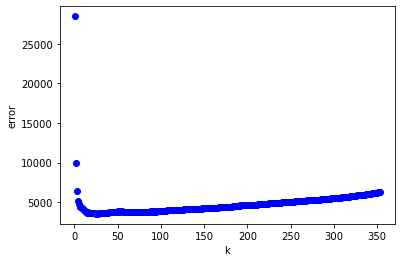

In [23]:
arr=np.arange(K)+1
plt.plot(arr,err,'ob')
plt.xlabel("k")
plt.ylabel("error")
plt.show()